# Salary prediction

In this notebook, I will try to create salary predictor based on answers given to 2014 Survey of Adult Skills (PIAAC) which was conducted globally..

First, we'll import usefull packages.
Then, we'll load the data, and preprocess it.
With the data we'll train two models with different parameters values and chooose the one with the best results.


# Import needed packages

In [141]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load dataset

check its description, and examine some samples

In [142]:
file_path = "wage_predict.csv"
fd = pd.read_csv(file_path, sep=',')
fd.info()### get info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industry               2005 non-null   object 
 1   occupation             2005 non-null   int64  
 2   yrs_qual               2005 non-null   int64  
 3   sex                    2005 non-null   int64  
 4   highest_qual           2005 non-null   int64  
 5   area_of_study          2005 non-null   int64  
 6   influencing            2005 non-null   int64  
 7   negotiating            2005 non-null   int64  
 8   sector                 2005 non-null   int64  
 9   workforce_change       2005 non-null   int64  
 10  no_subordinates        2005 non-null   int64  
 11  choose_hours           2005 non-null   int64  
 12  choose_method          2005 non-null   int64  
 13  job_quals              2005 non-null   int64  
 14  qual_needed            2005 non-null   int64  
 15  expe

In [143]:
fd.head()

,industry,occupation,yrs_qual,sex,highest_qual,area_of_study,influencing,negotiating,sector,workforce_change,no_subordinates,choose_hours,choose_method,job_quals,qual_needed,experience_needed,keeping_current,satisfaction,advising,instructing,problem_solving_quick,problem_solving_long,labour,manual_skill,computer,group_meetings,computer_level,monthly_salary
0,Q,2,19,1,13,4,2,1,1,3,3,3,4,13,1,5,4,2,5,4,5,4,4,5,1,1,2,23833.333333
1,C,9,14,1,11,7,4,2,1,1,0,3,4,7,1,1,4,3,5,3,5,3,4,5,1,1,1,6583.333333
2,L,3,16,2,12,4,2,1,1,3,0,5,5,9,1,3,2,2,3,1,4,2,1,5,1,1,2,433.333333
3,Q,5,12,2,7,4,5,4,2,1,0,3,1,7,1,3,5,2,5,2,5,2,5,5,2,1,0,379.000000
4,P,1,18,1,13,4,3,4,3,3,0,3,4,12,1,6,3,2,4,2,5,4,1,5,1,2,2,4583.333333


In [144]:
fd.head()

,industry,occupation,yrs_qual,sex,highest_qual,area_of_study,influencing,negotiating,sector,workforce_change,no_subordinates,choose_hours,choose_method,job_quals,qual_needed,experience_needed,keeping_current,satisfaction,advising,instructing,problem_solving_quick,problem_solving_long,labour,manual_skill,computer,group_meetings,computer_level,monthly_salary
0,Q,2,19,1,13,4,2,1,1,3,3,3,4,13,1,5,4,2,5,4,5,4,4,5,1,1,2,23833.333333
1,C,9,14,1,11,7,4,2,1,1,0,3,4,7,1,1,4,3,5,3,5,3,4,5,1,1,1,6583.333333
2,L,3,16,2,12,4,2,1,1,3,0,5,5,9,1,3,2,2,3,1,4,2,1,5,1,1,2,433.333333
3,Q,5,12,2,7,4,5,4,2,1,0,3,1,7,1,3,5,2,5,2,5,2,5,5,2,1,0,379.000000
4,P,1,18,1,13,4,3,4,3,3,0,3,4,12,1,6,3,2,4,2,5,4,1,5,1,2,2,4583.333333


# statistical data
Examine the dataset and check for imbalance

In [145]:
fd.describe()

,occupation,yrs_qual,sex,highest_qual,area_of_study,influencing,negotiating,sector,workforce_change,no_subordinates,choose_hours,choose_method,job_quals,qual_needed,experience_needed,keeping_current,satisfaction,advising,instructing,problem_solving_quick,problem_solving_long,labour,manual_skill,computer,group_meetings,computer_level,monthly_salary
count,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000
mean,4.078304,13.877805,1.520200,9.310723,4.104738,3.316209,2.762594,1.385536,2.296758,0.636908,2.669327,3.365586,8.601995,1.485287,3.561596,3.445885,2.001995,3.841397,3.275312,4.252868,3.126185,3.364589,4.402993,1.186035,1.819950,1.378554,4393.986833
std,2.472676,2.767168,0.499716,3.059247,2.605844,1.682291,1.701384,0.621063,0.865284,1.133255,1.300960,1.128258,3.138391,0.664473,1.935286,1.380535,0.856463,1.403511,1.432797,1.121108,1.300828,1.733848,1.275906,0.389232,1.267985,0.864491,4679.512869
min,0.000000,6.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,34.666667
25%,2.000000,12.000000,1.000000,7.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,3.000000,7.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000,4.000000,2.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1859.000000
50%,3.000000,13.000000,2.000000,9.000000,4.000000,4.000000,2.000000,1.000000,3.000000,0.000000,3.000000,3.000000,7.000000,1.000000,4.000000,3.000000,2.000000,4.000000,3.000000,5.000000,3.000000,4.000000,5.000000,1.000000,1.000000,1.000000,3253.466667
75%,5.000000,16.000000,2.000000,12.000000,6.000000,5.000000,5.000000,2.000000,3.000000,1.000000,4.000000,4.000000,12.000000,2.000000,5.000000,5.000000,2.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,1.000000,2.000000,2.000000,5458.333333
max,15.000000,21.000000,2.000000,15.000000,9.000000,5.000000,5.000000,3.000000,3.000000,5.000000,5.000000,5.000000,14.000000,3.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,5.000000,3.000000,68553.330000


# encode categorical column

In [146]:
label_encoder = LabelEncoder()
fd.iloc[:,0] = label_encoder.fit_transform(fd.iloc[:,0]).astype('int32')

# Check corelation to reduce dimensionality
reduce high correlated columns

<AxesSubplot: >

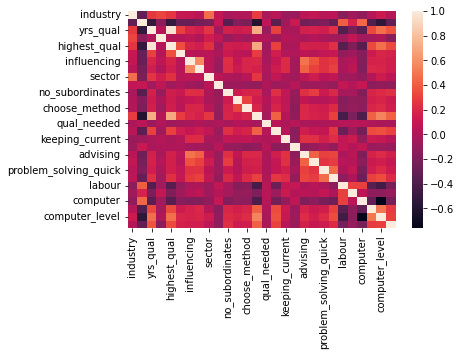

In [147]:
corr = fd.corr()
sns.heatmap(corr)

Next, we compare the correlation between features and remove one of two features that have a correlation higher than 0.9

In [148]:
columns = np.full((corr.shape[0],), True, dtype=bool) # array of descriptor per column. default descriptor value is True
for i in range(corr.shape[0]): # False for each column with high correlation
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = fd.columns[columns]
fd = fd[selected_columns]

# Define global vriables
The method of splitting dataset into train and test sets, and then evaluating accuracy by them, is not very reliable. The main reason is the accuracy obtained for one test set can be very different to the accuracy obtained for a different test set. K-fold Cross Validation(CV) provides a solution to this problem by dividing the data into folds and ensuring that each fold is used as a testing set at some point. We will use this method to test the predictor model. 

In [149]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
min_error = np.Inf
models_params = 0

### seperate_target_from_data function:
split the dataset into features and target, so we can compare predicted results to the expected. after examining the dataset I realize that industry feature has a negligible influence on the target, thus I didn't include it in the dataset.

In [150]:
def seperate_target_from_data(fd):
    y = fd['monthly_salary'].values  # get pandas values as np
    fd = fd.drop(columns=['monthly_salary'])
    X = fd.loc[:, 'occupation':].values
    return X, y

### prepocess_dataset function:
normalize all the features. I choose to normalize the input features with Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature is going to be 0 and 1, respectively. The main reason of this scaling is to avoid bias. 

In [151]:
def prepocess_dataset(x):
    # scale while keeping ordinal data
    min_max_scaler = MinMaxScaler()
    min_max_scaler.fit(x)
    x = min_max_scaler.transform(x)
    return x

### train_model function:
trains the model with the current chosen data by kfold cross validation.

In [152]:
def train_model(x_train, y_train, model):
    model.fit(x_train, y_train)
    return model

### predict_model function:
calculates predicted results. It returns error between predicted results and expected results

In [153]:
def predict_model(x_test, y_test, model):
    y_predict = model.predict(x_test)
    error = calc_error("GradientBoostingRegressor", y_test, y_predict)
    return error

### calc_error function:
calculates the error between predicted results and expected results using mean-square-error

In [154]:
def calc_error(title, expected, predicted):
    # calculate errors
    errors = mean_absolute_error(expected, predicted)
    return errors

### calc_min_error function:
updates min_error if error_val is smaller. It returns min_error and a flag, save_this_value that signals to save model parameters.  

In [155]:
def calc_min_error(error_val, min_error):
    save_this_value = False
    if min_error > error_val:
        min_error = error_val
        save_this_value = True
    return min_error, save_this_value

### evaluate_model function:
iterates over all fold from the kfoldcross validation function. It preprocess each x_traun dataset, then it train the model with it. After the model is trained, it get predictions from it. The parameters of the model with the minimum error are saved, and we got best model from all the models with different learning-rate and depth. We also get the minimum error each model achieved, for choosing the best model.  

In [156]:
def evaluate_model(model, kf, learning_rate, depth, fd, min_error):
    X, y = seperate_target_from_data(fd)
    local_min = np.inf
    model_params = None
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        X_train = prepocess_dataset(X_train)
        model = train_model(X_train, y_train, model)
        error_val = predict_model(X_train, y_train, model)
        min_error, save_this_value = calc_min_error(error_val, min_error)
        if save_this_value:
            model_params = (learning_rate, depth)
        local_min , save_this_value = calc_min_error(error_val, local_min)
        if save_this_value:
            local_model_params = (learning_rate, depth)    
    # report error
    print(type(model).__name__, " mae =  ", local_min)
    return min_error, model_params

### first try, we use  linear regression model to get good predictions

In [157]:
lr = 0
d= 0
model = LinearRegression()
min_error, _ = evaluate_model(model, cv, lr, d, fd, min_error)
print("best mean_absolute_error (mae) after  LinearRegression = ", min_error)

LinearRegression  mae =   1977.516541887651
best mean_absolute_error (mae) after  LinearRegression =  1977.516541887651


### In the second try we use RandomForest to get better results. we iterate over tree depth to find the best model results 

### In the third try we examine gradient boosting model in which we iterates over learning rate and max depth of trees. Those values create different models to be examined. 

In [158]:
X=fd.drop(['monthly_salary'],axis=1)
y=fd.monthly_salary

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

# Conclusion
### we got the best model that can predict salary according to features. 
for this dataset it is gradient boosting with learning rate of 0.2 and tree max_depth of 8.

In [160]:
fd.head(100)

,industry,occupation,yrs_qual,sex,area_of_study,influencing,negotiating,sector,workforce_change,no_subordinates,choose_hours,choose_method,job_quals,qual_needed,experience_needed,keeping_current,satisfaction,advising,instructing,problem_solving_quick,problem_solving_long,labour,manual_skill,computer,group_meetings,computer_level,monthly_salary
0,16,2,19,1,4,2,1,1,3,3,3,4,13,1,5,4,2,5,4,5,4,4,5,1,1,2,23833.333333
1,2,9,14,1,7,4,2,1,1,0,3,4,7,1,1,4,3,5,3,5,3,4,5,1,1,1,6583.333333
2,11,3,16,2,4,2,1,1,3,0,5,5,9,1,3,2,2,3,1,4,2,1,5,1,1,2,433.333333
3,16,5,12,2,4,5,4,2,1,0,3,1,7,1,3,5,2,5,2,5,2,5,5,2,1,0,379.000000
4,15,1,18,1,4,3,4,3,3,0,3,4,12,1,6,3,2,4,2,5,4,1,5,1,2,2,4583.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,16,3,12,2,8,1,1,1,3,3,1,4,7,1,6,2,2,4,4,4,3,1,5,1,1,2,3186.666667
96,15,2,16,2,2,5,1,2,3,0,1,4,12,1,1,2,2,5,5,4,2,5,5,1,1,1,1430.000000
97,9,2,16,2,3,1,1,1,1,0,1,4,12,2,3,4,2,3,1,5,4,4,4,1,4,3,5500.000000
98,2,2,16,1,6,4,4,1,1,0,4,4,12,1,4,2,4,2,2,2,4,1,1,1,4,2,5250.000000


In [161]:
model = GradientBoostingRegressor(learning_rate = 0.01, max_depth = 100)

In [162]:
X=fd.drop(["monthly_salary"],axis=1)
y=fd['monthly_salary']

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

In [164]:
model.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=100)

In [165]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
pred=model.predict(X_test)
mean_absolute_error(y_test,pred)

2314.310659423686

In [166]:
# from sklearn.metrics import accuracy_score
# acc = model.score(X_test,y_test)
# acc

In [167]:
from sklearn.linear_model import LogisticRegression
model_1=LogisticRegression()

In [168]:
y_train

1095     5416.666667
1809     4333.333333
180      3750.000000
551     25783.333333
722      3206.666667
            ...     
1599     9083.333333
1862     1248.000000
1361     4416.666667
1547     7083.333333
863       234.000000
Name: monthly_salary, Length: 1203, dtype: float64

In [169]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
regressor.fit(X_train, y_train)

SVR(kernel='linear')

In [170]:
pred11=regressor.predict(X_test)
mean_absolute_error(y_test, pred11)

1930.9575328771014

In [171]:
X

,industry,occupation,yrs_qual,sex,area_of_study,influencing,negotiating,sector,workforce_change,no_subordinates,choose_hours,choose_method,job_quals,qual_needed,experience_needed,keeping_current,satisfaction,advising,instructing,problem_solving_quick,problem_solving_long,labour,manual_skill,computer,group_meetings,computer_level
0,16,2,19,1,4,2,1,1,3,3,3,4,13,1,5,4,2,5,4,5,4,4,5,1,1,2
1,2,9,14,1,7,4,2,1,1,0,3,4,7,1,1,4,3,5,3,5,3,4,5,1,1,1
2,11,3,16,2,4,2,1,1,3,0,5,5,9,1,3,2,2,3,1,4,2,1,5,1,1,2
3,16,5,12,2,4,5,4,2,1,0,3,1,7,1,3,5,2,5,2,5,2,5,5,2,1,0
4,15,1,18,1,4,3,4,3,3,0,3,4,12,1,6,3,2,4,2,5,4,1,5,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,13,3,12,2,8,4,5,1,1,1,3,5,7,1,6,3,2,5,5,5,3,1,5,1,5,2
2001,2,3,16,1,4,3,3,1,3,2,3,4,11,1,5,4,3,4,4,4,2,3,4,1,1,2
2002,16,1,18,2,4,4,1,2,2,1,2,3,11,3,5,2,4,4,4,4,3,2,5,1,2,2
2003,12,4,12,2,4,5,1,2,1,0,5,4,7,1,1,5,1,5,2,5,4,1,5,1,1,2


In [172]:
pd.set_option('display.max_columns', None)
X.head()

,industry,occupation,yrs_qual,sex,area_of_study,influencing,negotiating,sector,workforce_change,no_subordinates,choose_hours,choose_method,job_quals,qual_needed,experience_needed,keeping_current,satisfaction,advising,instructing,problem_solving_quick,problem_solving_long,labour,manual_skill,computer,group_meetings,computer_level
0,16,2,19,1,4,2,1,1,3,3,3,4,13,1,5,4,2,5,4,5,4,4,5,1,1,2
1,2,9,14,1,7,4,2,1,1,0,3,4,7,1,1,4,3,5,3,5,3,4,5,1,1,1
2,11,3,16,2,4,2,1,1,3,0,5,5,9,1,3,2,2,3,1,4,2,1,5,1,1,2
3,16,5,12,2,4,5,4,2,1,0,3,1,7,1,3,5,2,5,2,5,2,5,5,2,1,0
4,15,1,18,1,4,3,4,3,3,0,3,4,12,1,6,3,2,4,2,5,4,1,5,1,2,2


In [173]:
fd

,industry,occupation,yrs_qual,sex,area_of_study,influencing,negotiating,sector,workforce_change,no_subordinates,choose_hours,choose_method,job_quals,qual_needed,experience_needed,keeping_current,satisfaction,advising,instructing,problem_solving_quick,problem_solving_long,labour,manual_skill,computer,group_meetings,computer_level,monthly_salary
0,16,2,19,1,4,2,1,1,3,3,3,4,13,1,5,4,2,5,4,5,4,4,5,1,1,2,23833.333333
1,2,9,14,1,7,4,2,1,1,0,3,4,7,1,1,4,3,5,3,5,3,4,5,1,1,1,6583.333333
2,11,3,16,2,4,2,1,1,3,0,5,5,9,1,3,2,2,3,1,4,2,1,5,1,1,2,433.333333
3,16,5,12,2,4,5,4,2,1,0,3,1,7,1,3,5,2,5,2,5,2,5,5,2,1,0,379.000000
4,15,1,18,1,4,3,4,3,3,0,3,4,12,1,6,3,2,4,2,5,4,1,5,1,2,2,4583.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,13,3,12,2,8,4,5,1,1,1,3,5,7,1,6,3,2,5,5,5,3,1,5,1,5,2,4583.333333
2001,2,3,16,1,4,3,3,1,3,2,3,4,11,1,5,4,3,4,4,4,2,3,4,1,1,2,5858.333333
2002,16,1,18,2,4,4,1,2,2,1,2,3,11,3,5,2,4,4,4,4,3,2,5,1,2,2,11000.000000
2003,12,4,12,2,4,5,1,2,1,0,5,4,7,1,1,5,1,5,2,5,4,1,5,1,1,2,693.333333


In [174]:
fd.describe()

,industry,occupation,yrs_qual,sex,area_of_study,influencing,negotiating,sector,workforce_change,no_subordinates,choose_hours,choose_method,job_quals,qual_needed,experience_needed,keeping_current,satisfaction,advising,instructing,problem_solving_quick,problem_solving_long,labour,manual_skill,computer,group_meetings,computer_level,monthly_salary
count,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000
mean,10.045387,4.078304,13.877805,1.520200,4.104738,3.316209,2.762594,1.385536,2.296758,0.636908,2.669327,3.365586,8.601995,1.485287,3.561596,3.445885,2.001995,3.841397,3.275312,4.252868,3.126185,3.364589,4.402993,1.186035,1.819950,1.378554,4393.986833
std,4.982448,2.472676,2.767168,0.499716,2.605844,1.682291,1.701384,0.621063,0.865284,1.133255,1.300960,1.128258,3.138391,0.664473,1.935286,1.380535,0.856463,1.403511,1.432797,1.121108,1.300828,1.733848,1.275906,0.389232,1.267985,0.864491,4679.512869
min,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,34.666667
25%,6.000000,2.000000,12.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,3.000000,7.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000,4.000000,2.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1859.000000
50%,9.000000,3.000000,13.000000,2.000000,4.000000,4.000000,2.000000,1.000000,3.000000,0.000000,3.000000,3.000000,7.000000,1.000000,4.000000,3.000000,2.000000,4.000000,3.000000,5.000000,3.000000,4.000000,5.000000,1.000000,1.000000,1.000000,3253.466667
75%,15.000000,5.000000,16.000000,2.000000,6.000000,5.000000,5.000000,2.000000,3.000000,1.000000,4.000000,4.000000,12.000000,2.000000,5.000000,5.000000,2.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,1.000000,2.000000,2.000000,5458.333333
max,20.000000,15.000000,21.000000,2.000000,9.000000,5.000000,5.000000,3.000000,3.000000,5.000000,5.000000,5.000000,14.000000,3.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,5.000000,3.000000,68553.330000


In [175]:
a=list(fd.iloc[0,0:26])

In [176]:
regressor.predict([a])

c:\Users\Pulkit Rustagi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([5628.98052628])

In [177]:
data1=fd
df=data1

In [178]:
df.drop(df[df.monthly_salary < 1000].index, inplace=True)
df.drop(df[df.monthly_salary > 8000].index, inplace=True)



In [179]:
df.describe()

,industry,occupation,yrs_qual,sex,area_of_study,influencing,negotiating,sector,workforce_change,no_subordinates,choose_hours,choose_method,job_quals,qual_needed,experience_needed,keeping_current,satisfaction,advising,instructing,problem_solving_quick,problem_solving_long,labour,manual_skill,computer,group_meetings,computer_level,monthly_salary
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.00000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,9.973750,4.178750,13.721250,1.540625,4.083750,3.269375,2.731875,1.384375,2.320000,0.585000,2.571250,3.332500,8.500625,1.485625,3.468125,3.479375,2.00250,3.85125,3.306875,4.29000,3.155000,3.480000,4.496875,1.181875,1.736875,1.349375,3563.313761
std,5.037129,2.440906,2.632086,0.498503,2.638387,1.695910,1.710428,0.616943,0.854726,1.073427,1.283921,1.119811,2.984010,0.664319,1.897692,1.380948,0.86195,1.40191,1.441875,1.09277,1.286277,1.712508,1.180407,0.385862,1.199913,0.838303,1817.904125
min,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1000.000000
25%,6.000000,2.000000,12.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,7.000000,1.000000,1.000000,2.000000,1.00000,3.00000,2.000000,4.00000,2.000000,2.000000,5.000000,1.000000,1.000000,1.000000,2056.487500
50%,9.000000,3.000000,13.000000,2.000000,4.000000,4.000000,2.000000,1.000000,3.000000,0.000000,3.000000,3.000000,7.000000,1.000000,3.000000,4.000000,2.00000,4.00000,4.000000,5.00000,3.000000,4.000000,5.000000,1.000000,1.000000,1.000000,3216.333333
75%,15.000000,5.000000,16.000000,2.000000,6.000000,5.000000,5.000000,2.000000,3.000000,1.000000,3.000000,4.000000,12.000000,2.000000,5.000000,5.000000,2.00000,5.00000,5.000000,5.00000,4.000000,5.000000,5.000000,1.000000,2.000000,2.000000,4760.416667
max,19.000000,15.000000,21.000000,2.000000,9.000000,5.000000,5.000000,3.000000,3.000000,5.000000,5.000000,5.000000,14.000000,3.000000,6.000000,5.000000,5.00000,5.00000,5.000000,5.00000,5.000000,5.000000,5.000000,2.000000,5.000000,3.000000,8000.000000


In [180]:
X=df.drop(["monthly_salary"],axis=1)
y=df['monthly_salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

regressor1 = SVR(kernel = 'linear')
regressor1.fit(X_train, y_train)
pred11=regressor1.predict(X_test)
mean_absolute_error(y_test, pred11)

1156.2178361970368

In [181]:
a=regressor1.predict([X_train.iloc[0,]])
a[0]

c:\Users\Pulkit Rustagi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


2009.683528283536

In [182]:
industry = {
    "Agriculture, forestry and fishing": 0,
    "Mining and quarrying": 1,
    "Manufacturing": 2,
    "Electricity, gas, steam and air conditioning supply": 3,
    "Water supply; sewerage, waste management and remediation activities": 4,
    "Construction": 5,
    "Wholesale and retail trade; repair of motor vehicles and motorcycles": 6,
    "Transportation and storage": 7,
    "Accommodation and food service activities": 8,
    "Information and communication": 9,
    "Financial and insurance activities": 10,
    "Real estate activities": 11,
    "Professional, scientific and technical activities": 12,
    "Administrative and support service activities": 13,
    "Public administration and defence; compulsory social security": 14,
    "Education": 15,
    "Human health and social work activities": 16,
    "Arts, entertainment and recreation": 17,
    "Other service activities": 18,
    "Activities of households as employers; undifferentiated goods- and services-producing activities of households for own use": 19,
    "Activities of extraterritorial organizations and bodies": 20
}
occupation= {
    "Armed forces": 0,
    "Legislators, senior officials and managers": 1,
    "Professionals": 2,
    "Technicians and associate professionals": 3,
    "Clerks": 4,
    "Service workers and shop and market sales workers": 5,
    "Skilled agricultural and fishery workers": 6,
    "Craft and related trades workers": 7,
    "Plant and machine operators and assemblers": 8,
    "Elementary occupations": 9
}
areaofstdy = {
    "Did not study": 0,
    "General programmes": 1,
    "Teacher training and education science": 2,
    "Humanities, languages and arts": 3,
    "Social sciences, business and law": 4,
    "Science, mathematics and computing": 5,
    "Engineering, manufacturing and construction": 6,
    "Agriculture and veterinary": 7,
    "Health and welfare": 8,
    "Services": 9
}
workforce = {
    "Increased": 1,
    "Decreased": 2,
    "Stayed more or less the same": 3
}
education_levels = {
    "No formal education or below ISCED 1": 1,
    "ISCED 1": 2,
    "ISCED 2": 3,
    "ISCED 3C shorter than 2 years": 4,
    "ISCED 3C 2 years or more": 5,
    "ISCED 3A-B": 6,
    "ISCED 3 (without distinction A-B-C, 2y+)": 7,
    "ISCED 4C": 8,
    "ISCED 4A-B": 9,
    "ISCED 4 (without distinction A-B-C)": 10,
    "ISCED 5B": 11,
    "ISCED 5A, bachelor degree": 12,
    "ISCED 5A, master degree": 13,
    "ISCED 6": 14
}

In [183]:
def answer(list1):
    def changer(l):
        for i in range(len(l)):
            if i == 0:
                l[i]=industry[l[i]]
            elif i==1:
                l[i]=occupation[l[i]]
            elif i==4:
                l[i]=areaofstdy[l[i]]
            elif i==8:
                l[i]=workforce[l[i]]
            elif i==12:
                l[i]=education_levels[l[i]]
            else:
                l[i]=int(l[i])
    changer(list1)
    return regressor1.predict([list1])[0]

In [184]:
import customtkinter as ctk
import tkinter as tk

In [188]:
# Python program to create a basic form
# GUI application using the customtkinter module


# Sets the appearance of the window
ctk.set_appearance_mode("System")

# Sets the color of the widgets in the window
ctk.set_default_color_theme("dark-blue")

# Dimensions of the window
appWidth, appHeight = 1920, 1080


# App Class
class App(ctk.CTk):
	# The layout of the window will be written
	# in the init function itself
	def __init__(self, *args, **kwargs):
		super().__init__(*args, **kwargs)

		# Sets the title of the window to "App"
		self.title("PATH FINDER")

		self.geometry(f"{appWidth}x{appHeight}")
		#self.iconbitmap('C:/Users/Pulkit Rustagi/Dropbox/PC/Desktop/college/coding/Python/kinter/design_icon.ico')

		# Scrollbar
		self.main_frame = ctk.CTkFrame(self, fg_color = "#1F1B24")
		self.main_frame.pack(fill = 'both', expand = 1)

		self.main_canvas = tk.Canvas(self.main_frame, bg = "#1F1B24")
		self.main_canvas.pack(side = "left", fill = "both", expand = 1)

		self.scroll = ctk.CTkScrollbar(self.main_frame, orientation = "vertical", command = self.main_canvas.yview)
		self.scroll.pack(side = "right", fill = 'y')

		self.main_canvas.configure(yscrollcommand = self.scroll.set)
		self.main_canvas.bind("<Configure>", lambda e: self.main_canvas.configure(scrollregion = self.main_canvas.bbox("all")))

		self.second_frame = ctk.CTkFrame(self.main_canvas, fg_color = "#1F1B24")
		self.main_canvas.create_window((0, 0), window = self.second_frame, anchor = "nw")


		# Industry Label
		self.industryLabel = ctk.CTkLabel(self.second_frame, text = "Industry")
		self.industryLabel.grid(row = 0, column = 0, padx = 20, pady = 20, sticky = "ew")
		# Industry Entry Field
		self.industryEntry = ctk.CTkEntry(self.second_frame, placeholder_text = "Enter your industry, ex: Manufacturing")
		self.industryEntry.grid(row = 0, column = 1, columnspan = 3, padx = 20, pady = 20, sticky = "ew")

		# Occupation Label
		self.occupationLabel = ctk.CTkLabel(self.second_frame, text="Occupation")
		self.occupationLabel.grid(row = 1, column = 0, padx = 20, pady = 20, sticky = "ew")
		# Occupation Entry Field
		self.occupationEntry = ctk.CTkEntry(self.second_frame, placeholder_text = "enter your occupation details, ex: Clerks/Professionals etc..")
		self.occupationEntry.grid(row = 1, column = 1,columnspan = 3, padx = 20,pady = 20, sticky = "ew")

		# years_qualified Label
		self.years_qualifiedLabel = ctk.CTkLabel(self.second_frame, text="Years Qualification")
		self.years_qualifiedLabel.grid(row = 2, column = 0, padx = 20, pady = 20, sticky = "ew")
		# years_qualified Entry Field
		self.years_qualifiedEntry = ctk.CTkEntry(self.second_frame, placeholder_text = "Enter your total years of schooling during lifetime")
		self.years_qualifiedEntry.grid(row = 2, column = 1,columnspan = 3, padx = 20,pady = 20, sticky = "ew")

		# Gender Label
		self.genderLabel = ctk.CTkLabel(self.second_frame, text = "Gender")
		self.genderLabel.grid(row = 3, column = 0, padx = 20, pady = 20, sticky = "ew")

		# Gender Radio Buttons
		self.genderVar = tk.StringVar(value = "Others")

		self.maleRadioButton = ctk.CTkRadioButton(self.second_frame, text = "Male", variable = self.genderVar, value = "1")
		self.maleRadioButton.grid(row = 3, column = 1,padx = 20, pady = 20,sticky = "ew")

		self.femaleRadioButton = ctk.CTkRadioButton(self.second_frame, text = "Female", variable = self.genderVar, value = "2")
		self.femaleRadioButton.grid(row = 3, column = 2, padx = 20, pady = 20, sticky = "ew")
		
		self.otherRadioButton = ctk.CTkRadioButton(self.second_frame, text = "Others", variable = self.genderVar, value = "2")
		self.otherRadioButton.grid(row = 3, column = 3, padx = 20, pady = 20, sticky = "ew")

		'''# Highest Qualification Label
		self.high_qualLabel = ctk.CTkLabel(self.second_frame, text = "Highest Qualification")
		self.high_qualLabel.grid(row = 4, column = 0, padx = 20, pady = 20, sticky = "ew")
		# Highest Qualification Entry Field
		self.high_qualEntry = ctk.CTkEntry(self.second_frame, placeholder_text = "Enter your highest qualification as per ISCED")
		self.high_qualEntry.grid(row = 4, column = 1, columnspan = 3, padx = 20, pady = 20, sticky = "ew")'''
		
		# Area of Study Label
		self.area_of_steadyLabel = ctk.CTkLabel(self.second_frame, text = "Area of study")
		self.area_of_steadyLabel.grid(row = 5, column = 0, padx = 20, pady = 20, sticky = "ew")
		# Area of Study Entry Field
		self.area_of_steadyEntry = ctk.CTkEntry(self.second_frame, placeholder_text = "Enter your area of study, ex: Health and Welfare")
		self.area_of_steadyEntry.grid(row = 5, column = 1, columnspan = 3, padx = 20, pady = 20, sticky = "ew")

		# Influencing Label
		self.influencingLabel = ctk.CTkLabel(self.second_frame, text = "Influencing")
		self.influencingLabel.grid(row = 6, column = 0, padx = 20, pady = 20, sticky = "ew")

		# Influencing Radio Buttons
		self.influencingVar = tk.StringVar(value = "1")

		self.iRadioButton1 = ctk.CTkRadioButton(self.second_frame, text = "Every day", variable = self.influencingVar, value = "5")
		self.iRadioButton1.grid(row = 6, column = 1,padx = 20, pady = 20,sticky = "ew")

		self.iRadioButton2 = ctk.CTkRadioButton(self.second_frame, text = "Less than once a month", variable = self.influencingVar, value = "2")
		self.iRadioButton2.grid(row = 6, column = 2, padx = 20, pady = 20, sticky = "ew")
		
		self.iRadioButton3 = ctk.CTkRadioButton(self.second_frame, text = "Less than once a week but at least once a month", variable = self.influencingVar, value = "3")
		self.iRadioButton3.grid(row = 6, column = 3, padx = 20, pady = 20, sticky = "ew")

		self.iRadioButton4 = ctk.CTkRadioButton(self.second_frame, text = "A least once a week but not every day", variable = self.influencingVar, value = "4")
		self.iRadioButton4.grid(row = 6, column = 4, padx = 20, pady = 20, sticky = "ew")

		self.iRadioButton5 = ctk.CTkRadioButton(self.second_frame, text = "Never", variable = self.influencingVar, value = "1")
		self.iRadioButton5.grid(row = 6, column = 5, padx = 20, pady = 20, sticky = "ew")

		# negotiating Label
		self.negotiatingLabel = ctk.CTkLabel(self.second_frame, text = "Negotiating")
		self.negotiatingLabel.grid(row = 7, column = 0, padx = 20, pady = 20, sticky = "ew")

		# Negotiating Radio Buttons
		self.negotiatingVar = tk.StringVar(value = "1")

		self.nRadioButton1 = ctk.CTkRadioButton(self.second_frame, text = "Every day", variable = self.negotiatingVar, value = "5")
		self.nRadioButton1.grid(row = 7, column = 1,padx = 20, pady = 20,sticky = "ew")

		self.nRadioButton2 = ctk.CTkRadioButton(self.second_frame, text = "Less than once a month", variable = self.negotiatingVar, value = "2")
		self.nRadioButton2.grid(row = 7, column = 2, padx = 20, pady = 20, sticky = "ew")
		
		self.nRadioButton3 = ctk.CTkRadioButton(self.second_frame, text = "Less than once a week but at least once a month", variable = self.negotiatingVar, value = "3")
		self.nRadioButton3.grid(row = 7, column = 3, padx = 20, pady = 20, sticky = "ew")

		self.nRadioButton4 = ctk.CTkRadioButton(self.second_frame, text = "A least once a week but not every day", variable = self.negotiatingVar, value = "4")
		self.nRadioButton4.grid(row = 7, column = 4, padx = 20, pady = 20, sticky = "ew")

		self.nRadioButton5 = ctk.CTkRadioButton(self.second_frame, text = "Never", variable = self.negotiatingVar, value = "1")
		self.nRadioButton5.grid(row = 7, column = 5, padx = 20, pady = 20, sticky = "ew")
	
		# Sector Label
		self.sectorLabel = ctk.CTkLabel(self.second_frame, text = "Sector")
		self.sectorLabel.grid(row = 8, column = 0, padx = 20, pady = 20, sticky = "ew")

		# Sector Radio Buttons
		self.sectorVar = tk.StringVar(value = "3")

		self.privateRadioButton = ctk.CTkRadioButton(self.second_frame, text = "Private", variable = self.sectorVar, value = "1")
		self.privateRadioButton.grid(row = 8, column = 1,padx = 20, pady = 20,sticky = "ew")

		self.publicRadioButton = ctk.CTkRadioButton(self.second_frame, text = "Public", variable = self.sectorVar, value = "2")
		self.publicRadioButton.grid(row = 8, column = 2, padx = 20, pady = 20, sticky = "ew")
		
		self.non_profitRadioButton = ctk.CTkRadioButton(self.second_frame, text = "Non-Profit", variable = self.sectorVar, value = "3")
		self.non_profitRadioButton.grid(row = 8, column = 3, padx = 20, pady = 20, sticky = "ew")

		# workforce_change Label
		self.workforce_changeLabel = ctk.CTkLabel(self.second_frame, text = "Workforce Change")
		self.workforce_changeLabel.grid(row = 9, column = 0, padx = 20, pady = 20, sticky = "ew")

		# workforce_change Radio Buttons
		self.workforce_changeVar = tk.StringVar(value = "Stayed more or less the same")

		self.increasedRadioButton = ctk.CTkRadioButton(self.second_frame, text = "Increased", variable = self.workforce_changeVar, value = "Increased")
		self.increasedRadioButton.grid(row = 9, column = 1,padx = 20, pady = 20,sticky = "ew")

		self.decreasedRadioButton = ctk.CTkRadioButton(self.second_frame, text = "Decreased", variable = self.workforce_changeVar, value = "Decreased")
		self.decreasedRadioButton.grid(row = 9, column = 2, padx = 20, pady = 20, sticky = "ew")
		
		self.sameRadioButton = ctk.CTkRadioButton(self.second_frame, text = "Stayed more or less the same", variable = self.workforce_changeVar, value = "Stayed more or less the same")
		self.sameRadioButton.grid(row = 9, column = 3, padx = 20, pady = 20, sticky = "ew")

		# subordinates Label
		self.subordinatesLabel = ctk.CTkLabel(self.second_frame, text = "Subordinates")
		self.subordinatesLabel.grid(row = 10, column = 0, padx = 20, pady = 20, sticky = "ew")

		# subordinates Radio Buttons
		self.subordinatesVar = tk.StringVar(value = "0 people")
		self.RadioButton1 = ctk.CTkRadioButton(self.second_frame, text = "0 people", variable = self.subordinatesVar, value = "0")
		self.RadioButton1.grid(row = 10, column = 1,padx = 20, pady = 20,sticky = "ew")

		self.RadioButton2 = ctk.CTkRadioButton(self.second_frame, text = "1 to 5 people", variable = self.subordinatesVar, value = "1")
		self.RadioButton2.grid(row = 10, column = 2, padx = 20, pady = 20, sticky = "ew")
		
		self.RadioButton3 = ctk.CTkRadioButton(self.second_frame, text = "6 to 10 people", variable = self.subordinatesVar, value = "2")
		self.RadioButton3.grid(row = 10, column = 3, padx = 20, pady = 20, sticky = "ew")

		self.RadioButton4 = ctk.CTkRadioButton(self.second_frame, text = "11 to 24 people", variable = self.subordinatesVar, value = "3")
		self.RadioButton4.grid(row = 10, column = 4, padx = 20, pady = 20, sticky = "ew")

		self.RadioButton5 = ctk.CTkRadioButton(self.second_frame, text = "25 to 99 people", variable = self.subordinatesVar, value = "4")
		self.RadioButton5.grid(row = 10, column = 5, padx = 20, pady = 20, sticky = "ew")

		# choose_hours Label
		self.choose_hoursLabel = ctk.CTkLabel(self.second_frame, text = "Choose Hours")
		self.choose_hoursLabel.grid(row = 11, column = 0, padx = 20, pady = 20, sticky = "ew")

		# choose_hours Radio Buttons
		self.choose_hoursVar = tk.StringVar(value = "1")

		self.chRadioButton1 = ctk.CTkRadioButton(self.second_frame, text = "Not at all", variable = self.choose_hoursVar, value = "1")
		self.chRadioButton1.grid(row = 11, column = 1,padx = 20, pady = 20,sticky = "ew")

		self.chRadioButton2 = ctk.CTkRadioButton(self.second_frame, text = "Very Little", variable = self.choose_hoursVar, value = "2")
		self.chRadioButton2.grid(row = 11, column = 2, padx = 20, pady = 20, sticky = "ew")
		
		self.chRadioButton3 = ctk.CTkRadioButton(self.second_frame, text = "To some extent", variable = self.choose_hoursVar, value = "3")
		self.chRadioButton3.grid(row = 11, column = 3, padx = 20, pady = 20, sticky = "ew")

		self.chRadioButton4 = ctk.CTkRadioButton(self.second_frame, text = "To a high extent", variable = self.choose_hoursVar, value = "4")
		self.chRadioButton4.grid(row = 11, column = 4, padx = 20, pady = 20, sticky = "ew")

		self.chRadioButton5 = ctk.CTkRadioButton(self.second_frame, text = "To a very high extent", variable = self.choose_hoursVar, value = "5")
		self.chRadioButton5.grid(row = 11, column = 5, padx = 20, pady = 20, sticky = "ew")

		# choose_method Label
		self.choose_methodLabel = ctk.CTkLabel(self.second_frame, text = "Choose Method")
		self.choose_methodLabel.grid(row = 12, column = 0, padx = 20, pady = 20, sticky = "ew")

		# choose_method Radio Buttons
		self.choose_methodVar = tk.StringVar(value = "1")

		self.cmRadioButton1 = ctk.CTkRadioButton(self.second_frame, text = "Not at all", variable = self.choose_methodVar, value = "1")
		self.cmRadioButton1.grid(row = 12, column = 1,padx = 20, pady = 20,sticky = "ew")

		self.cmRadioButton2 = ctk.CTkRadioButton(self.second_frame, text = "Very Little", variable = self.choose_methodVar, value = "2")
		self.cmRadioButton2.grid(row = 12, column = 2, padx = 20, pady = 20, sticky = "ew")
		
		self.cmRadioButton3 = ctk.CTkRadioButton(self.second_frame, text = "To some extent", variable = self.choose_methodVar, value = "3")
		self.cmRadioButton3.grid(row = 12, column = 3, padx = 20, pady = 20, sticky = "ew")

		self.cmRadioButton4 = ctk.CTkRadioButton(self.second_frame, text = "To a high extent", variable = self.choose_methodVar, value = "4")
		self.cmRadioButton4.grid(row = 12, column = 4, padx = 20, pady = 20, sticky = "ew")

		self.cmRadioButton5 = ctk.CTkRadioButton(self.second_frame, text = "To a very high extent", variable = self.choose_methodVar, value = "5")
		self.cmRadioButton5.grid(row = 12, column = 5, padx = 20, pady = 20, sticky = "ew")

		# Job Qualification Label
		self.job_qualLabel = ctk.CTkLabel(self.second_frame, text = "Job Qualification")
		self.job_qualLabel.grid(row = 13, column = 0, padx = 20, pady = 20, sticky = "ew")
		# Job Qualification Entry Field
		self.job_qualEntry = ctk.CTkEntry(self.second_frame, placeholder_text = "Required usual qualifications if need this job as per ISCED")
		self.job_qualEntry.grid(row = 13, column = 1, columnspan = 3, padx = 20, pady = 20, sticky = "ew")

		# qual_needed Label
		self.qual_neededLabel = ctk.CTkLabel(self.second_frame, text = "Workforce Change")
		self.qual_neededLabel.grid(row = 14, column = 0, padx = 20, pady = 20, sticky = "ew")

		# qual_needed Radio Buttons
		self.qual_neededVar = tk.StringVar(value = "Stayed more or less the same")

		self.qRadioButton1 = ctk.CTkRadioButton(self.second_frame, text = "This level is necessary", variable = self.qual_neededVar, value = "1")
		self.qRadioButton1.grid(row = 14, column = 1,padx = 20, pady = 20,sticky = "ew")

		self.qRadioButton2 = ctk.CTkRadioButton(self.second_frame, text = "A lower level would be sufficient", variable = self.qual_neededVar, value = "2")
		self.qRadioButton2.grid(row = 14, column = 2, padx = 20, pady = 20, sticky = "ew")
		
		self.qRadioButton3 = ctk.CTkRadioButton(self.second_frame, text = "A higher level would be needed", variable = self.qual_neededVar, value = "3")
		self.qRadioButton3.grid(row = 14, column = 3, padx = 20, pady = 20, sticky = "ew")

		# exp_need Label
		self.exp_needLabel = ctk.CTkLabel(self.second_frame, text = "Experience needed for this job")
		self.exp_needLabel.grid(row = 15, column = 0, padx = 20, pady = 20, sticky = "ew")

		# exp_need Radio Buttons
		self.exp_needVar = tk.StringVar(value = "0 people")
		self.eRadioButton1 = ctk.CTkRadioButton(self.second_frame, text = "0 people", variable = self.exp_needVar, value = "1")
		self.eRadioButton1.grid(row = 15, column = 1,padx = 20, pady = 20,sticky = "ew")

		self.eRadioButton2 = ctk.CTkRadioButton(self.second_frame, text = "1 to 5 people", variable = self.exp_needVar, value = "2")
		self.eRadioButton2.grid(row = 15, column = 2, padx = 20, pady = 20, sticky = "ew")
		
		self.eRadioButton3 = ctk.CTkRadioButton(self.second_frame, text = "6 to 10 people", variable = self.exp_needVar, value = "3")
		self.eRadioButton3.grid(row = 15, column = 3, padx = 20, pady = 20, sticky = "ew")

		self.eRadioButton4 = ctk.CTkRadioButton(self.second_frame, text = "11 to 24 people", variable = self.exp_needVar, value = "4")
		self.eRadioButton4.grid(row = 15, column = 4, padx = 20, pady = 20, sticky = "ew")

		self.eRadioButton5 = ctk.CTkRadioButton(self.second_frame, text = "25 to 99 people", variable = self.exp_needVar, value = "5")
		self.eRadioButton5.grid(row = 15, column = 5, padx = 20, pady = 20, sticky = "ew")
		
		# keep_curr Label
		self.keep_currLabel = ctk.CTkLabel(self.second_frame, text = "Your job involves new products?")
		self.keep_currLabel.grid(row = 16, column = 0, padx = 20, pady = 20, sticky = "ew")

		# keep_curr Radio Buttons
		self.keep_currVar = tk.StringVar(value = "Never")

		self.kRadioButton1 = ctk.CTkRadioButton(self.second_frame, text = "Every day", variable = self.keep_currVar, value = "5")
		self.kRadioButton1.grid(row = 16, column = 1,padx = 20, pady = 20,sticky = "ew")

		self.kRadioButton2 = ctk.CTkRadioButton(self.second_frame, text = "Less than once a month", variable = self.keep_currVar, value = "2")
		self.kRadioButton2.grid(row = 16, column = 2, padx = 20, pady = 20, sticky = "ew")
		
		self.kRadioButton3 = ctk.CTkRadioButton(self.second_frame, text = "Less than once a week but at least once a month", variable = self.keep_currVar, value = "3")
		self.kRadioButton3.grid(row = 16, column = 3, padx = 20, pady = 20, sticky = "ew")

		self.kRadioButton4 = ctk.CTkRadioButton(self.second_frame, text = "A least once a week but not every day", variable = self.keep_currVar, value = "4")
		self.kRadioButton4.grid(row = 16, column = 4, padx = 20, pady = 20, sticky = "ew")

		self.kRadioButton5 = ctk.CTkRadioButton(self.second_frame, text = "Never", variable = self.keep_currVar, value = "1")
		self.kRadioButton5.grid(row = 16, column = 5, padx = 20, pady = 20, sticky = "ew")

		# satisfaction Label
		self.satisfactionLabel = ctk.CTkLabel(self.second_frame, text = "Satisfaction")
		self.satisfactionLabel.grid(row = 17, column = 0, padx = 20, pady = 20, sticky = "ew")

		# satisfaction Radio Buttons
		self.satisfactionVar = tk.StringVar(value = "Extremely satisfied")

		self.sRadioButton1 = ctk.CTkRadioButton(self.second_frame, text = "Extremely satisfied", variable = self.satisfactionVar, value = "1")
		self.sRadioButton1.grid(row = 17, column = 1,padx = 20, pady = 20,sticky = "ew")

		self.sRadioButton2 = ctk.CTkRadioButton(self.second_frame, text = "satisfied", variable = self.satisfactionVar, value = "2")
		self.sRadioButton2.grid(row = 17, column = 2, padx = 20, pady = 20, sticky = "ew")
		
		self.sRadioButton3 = ctk.CTkRadioButton(self.second_frame, text = "Neither satisfied or dissatisfied", variable = self.satisfactionVar, value = "3")
		self.sRadioButton3.grid(row = 17, column = 3, padx = 20, pady = 20, sticky = "ew")

		self.sRadioButton4 = ctk.CTkRadioButton(self.second_frame, text = "Dissatisfied", variable = self.satisfactionVar, value = "4")
		self.sRadioButton4.grid(row = 17, column = 4, padx = 20, pady = 20, sticky = "ew")

		self.sRadioButton5 = ctk.CTkRadioButton(self.second_frame, text = "Extremely dissatisfied", variable = self.satisfactionVar, value = "5")
		self.sRadioButton5.grid(row = 17, column = 5, padx = 20, pady = 20, sticky = "ew")
	
		# advising Label
		self.advisingLabel = ctk.CTkLabel(self.second_frame, text = "Advising level")
		self.advisingLabel.grid(row = 18, column = 0, padx = 20, pady = 20, sticky = "ew")

		# advising Radio Buttons
		self.advisingVar = tk.StringVar(value = "Never")

		self.aRadioButton1 = ctk.CTkRadioButton(self.second_frame, text = "Every day", variable = self.advisingVar, value = "5")
		self.aRadioButton1.grid(row = 18, column = 1,padx = 20, pady = 20,sticky = "ew")

		self.aRadioButton2 = ctk.CTkRadioButton(self.second_frame, text = "Less than once a month", variable = self.advisingVar, value = "2")
		self.aRadioButton2.grid(row = 18, column = 2, padx = 20, pady = 20, sticky = "ew")
		
		self.aRadioButton3 = ctk.CTkRadioButton(self.second_frame, text = "Less than once a week but at least once a month", variable = self.advisingVar, value = "3")
		self.aRadioButton3.grid(row = 18, column = 3, padx = 20, pady = 20, sticky = "ew")

		self.aRadioButton4 = ctk.CTkRadioButton(self.second_frame, text = "A least once a week but not every day", variable = self.advisingVar, value = "4")
		self.aRadioButton4.grid(row = 18, column = 4, padx = 20, pady = 20, sticky = "ew")

		self.aRadioButton5 = ctk.CTkRadioButton(self.second_frame, text = "Never", variable = self.advisingVar, value = "1")
		self.aRadioButton5.grid(row = 18, column = 5, padx = 20, pady = 20, sticky = "ew")

		# instructing Label
		self.instructingLabel = ctk.CTkLabel(self.second_frame, text = "Instructing level")
		self.instructingLabel.grid(row = 19, column = 0, padx = 20, pady = 20, sticky = "ew")

		# instructing Radio Buttons
		self.instructingVar = tk.StringVar(value = "Never")

		self.insRadioButton1 = ctk.CTkRadioButton(self.second_frame, text = "Every day", variable = self.instructingVar, value = "5")
		self.insRadioButton1.grid(row = 19, column = 1,padx = 20, pady = 20,sticky = "ew")

		self.insRadioButton2 = ctk.CTkRadioButton(self.second_frame, text = "Less than once a month", variable = self.instructingVar, value = "2")
		self.insRadioButton2.grid(row = 19, column = 2, padx = 20, pady = 20, sticky = "ew")
		
		self.insRadioButton3 = ctk.CTkRadioButton(self.second_frame, text = "Less than once a week but at least once a month", variable = self.instructingVar, value = "3")
		self.insRadioButton3.grid(row = 19, column = 3, padx = 20, pady = 20, sticky = "ew")

		self.insRadioButton4 = ctk.CTkRadioButton(self.second_frame, text = "A least once a week but not every day", variable = self.instructingVar, value = "4")
		self.insRadioButton4.grid(row = 19, column = 4, padx = 20, pady = 20, sticky = "ew")

		self.insRadioButton5 = ctk.CTkRadioButton(self.second_frame, text = "Never", variable = self.instructingVar, value = "1")
		self.insRadioButton5.grid(row = 19, column = 5, padx = 20, pady = 20, sticky = "ew")

		# problem Label
		self.problemLabel = ctk.CTkLabel(self.second_frame, text = "problem_solving short")
		self.problemLabel.grid(row = 20, column = 0, padx = 20, pady = 20, sticky = "ew")

		# problem solving Radio Buttons
		self.problemVar = tk.StringVar(value = "Never")

		self.probRadioButton1 = ctk.CTkRadioButton(self.second_frame, text = "Every day", variable = self.problemVar, value = "5")
		self.probRadioButton1.grid(row = 20, column = 1,padx = 20, pady = 20,sticky = "ew")

		self.probRadioButton2 = ctk.CTkRadioButton(self.second_frame, text = "Less than once a month", variable = self.problemVar, value = "2")
		self.probRadioButton2.grid(row = 20, column = 2, padx = 20, pady = 20, sticky = "ew")
		
		self.probRadioButton3 = ctk.CTkRadioButton(self.second_frame, text = "Less than once a week but at least once a month", variable = self.problemVar, value = "3")
		self.probRadioButton3.grid(row = 20, column = 3, padx = 20, pady = 20, sticky = "ew")

		self.probRadioButton4 = ctk.CTkRadioButton(self.second_frame, text = "A least once a week but not every day", variable = self.problemVar, value = "4")
		self.probRadioButton4.grid(row = 20, column = 4, padx = 20, pady = 20, sticky = "ew")

		self.probRadioButton5 = ctk.CTkRadioButton(self.second_frame, text = "Never", variable = self.problemVar, value = "1")
		self.probRadioButton5.grid(row = 20, column = 5, padx = 20, pady = 20, sticky = "ew")

		# Problem-solving Label
		self.problemLabel = ctk.CTkLabel(self.second_frame, text = "problem_solving long")
		self.problemLabel.grid(row = 21, column = 0, padx = 20, pady = 20, sticky = "ew")

		# problem solving Radio Buttons
		self.problemlongVar = tk.StringVar(value = "Never")

		self.problongRadioButton1 = ctk.CTkRadioButton(self.second_frame, text = "Every day", variable = self.problemlongVar, value = "5")
		self.problongRadioButton1.grid(row = 21, column = 1,padx = 20, pady = 20,sticky = "ew")

		self.problongRadioButton2 = ctk.CTkRadioButton(self.second_frame, text = "Less than once a month", variable = self.problemlongVar, value = "2")
		self.problongRadioButton2.grid(row = 21, column = 2, padx = 20, pady = 20, sticky = "ew")
		
		self.problongRadioButton3 = ctk.CTkRadioButton(self.second_frame, text = "Less than once a week but at least once a month", variable = self.problemlongVar, value = "3")
		self.problongRadioButton3.grid(row = 21, column = 3, padx = 20, pady = 20, sticky = "ew")

		self.problongRadioButton4 = ctk.CTkRadioButton(self.second_frame, text = "A least once a week but not every day", variable = self.problemlongVar, value = "4")
		self.problongRadioButton4.grid(row = 21, column = 4, padx = 20, pady = 20, sticky = "ew")

		self.problongRadioButton5 = ctk.CTkRadioButton(self.second_frame, text = "Never", variable = self.problemlongVar, value = "1")
		self.problongRadioButton5.grid(row = 21, column = 5, padx = 20, pady = 20, sticky = "ew")

		# labour Label
		self.labourLabel = ctk.CTkLabel(self.second_frame, text = "Labour")
		self.labourLabel.grid(row = 22, column = 0, padx = 20, pady = 20, sticky = "ew")

		# labour Radio Buttons
		self.labourVar = tk.StringVar(value = "Never")

		self.labourRadioButton1 = ctk.CTkRadioButton(self.second_frame, text = "Every day", variable = self.labourVar, value = "5")
		self.labourRadioButton1.grid(row = 22, column = 1,padx = 20, pady = 20,sticky = "ew")

		self.labourRadioButton2 = ctk.CTkRadioButton(self.second_frame, text = "Less than once a month", variable = self.labourVar, value = "2")
		self.labourRadioButton2.grid(row = 22, column = 2, padx = 20, pady = 20, sticky = "ew")
		
		self.labourRadioButton3 = ctk.CTkRadioButton(self.second_frame, text = "Less than once a week but at least once a month", variable = self.labourVar, value = "3")
		self.labourRadioButton3.grid(row = 22, column = 3, padx = 20, pady = 20, sticky = "ew")

		self.labourRadioButton4 = ctk.CTkRadioButton(self.second_frame, text = "A least once a week but not every day", variable = self.labourVar, value = "4")
		self.labourRadioButton4.grid(row = 22, column = 4, padx = 20, pady = 20, sticky = "ew")

		self.labourRadioButton5 = ctk.CTkRadioButton(self.second_frame, text = "Never", variable = self.labourVar, value = "1")
		self.labourRadioButton5.grid(row = 22, column = 5, padx = 20, pady = 20, sticky = "ew")

		# manual-skill Label
		self.manualLabel = ctk.CTkLabel(self.second_frame, text = "Manual_skill")
		self.manualLabel.grid(row = 23, column = 0, padx = 20, pady = 20, sticky = "ew")

		# manual-skill Radio Buttons
		self.manualVar = tk.StringVar(value = "Never")

		self.manualRadioButton1 = ctk.CTkRadioButton(self.second_frame, text = "Every day", variable = self.manualVar, value = "5")
		self.manualRadioButton1.grid(row = 23, column = 1,padx = 20, pady = 20,sticky = "ew")

		self.manualRadioButton2 = ctk.CTkRadioButton(self.second_frame, text = "Less than once a month", variable = self.manualVar, value = "2")
		self.manualRadioButton2.grid(row = 23, column = 2, padx = 20, pady = 20, sticky = "ew")
		
		self.manualRadioButton3 = ctk.CTkRadioButton(self.second_frame, text = "Less than once a week but at least once a month", variable = self.manualVar, value = "3")
		self.manualRadioButton3.grid(row = 23, column = 3, padx = 20, pady = 20, sticky = "ew")

		self.manualRadioButton4 = ctk.CTkRadioButton(self.second_frame, text = "A least once a week but not every day", variable = self.manualVar, value = "4")
		self.manualRadioButton4.grid(row = 23, column = 4, padx = 20, pady = 20, sticky = "ew")

		self.manualRadioButton5 = ctk.CTkRadioButton(self.second_frame, text = "Never", variable = self.manualVar, value = "1")
		self.manualRadioButton5.grid(row = 23, column = 5, padx = 20, pady = 20, sticky = "ew")

		# Computer use Label
		self.computerLabel = ctk.CTkLabel(self.second_frame, text = "Computer use in previous job")
		self.computerLabel.grid(row = 24, column = 0, padx = 20, pady = 20, sticky = "ew")

		# Computer use Radio Buttons
		self.computerVar = tk.StringVar(value = "Never")

		self.computerRadioButton1 = ctk.CTkRadioButton(self.second_frame, text = "Yes", variable = self.computerVar, value = "1")
		self.computerRadioButton1.grid(row = 24, column = 1,padx = 20, pady = 20,sticky = "ew")

		self.computerRadioButton2 = ctk.CTkRadioButton(self.second_frame, text = "No", variable = self.computerVar, value = "2")
		self.computerRadioButton2.grid(row = 24, column = 2, padx = 20, pady = 20, sticky = "ew")

		# Group meetings Label
		self.grp_meetLabel = ctk.CTkLabel(self.second_frame, text = "Group Meet")
		self.grp_meetLabel.grid(row = 25, column = 0, padx = 20, pady = 20, sticky = "ew")

		# Group meetings Radio Buttons
		self.grp_meetVar = tk.StringVar(value = "Never")

		self.grp_meetRadioButton1 = ctk.CTkRadioButton(self.second_frame, text = "Every day", variable = self.grp_meetVar, value = "5")
		self.grp_meetRadioButton1.grid(row = 25, column = 1,padx = 20, pady = 20,sticky = "ew")

		self.grp_meetRadioButton2 = ctk.CTkRadioButton(self.second_frame, text = "Less than once a month", variable = self.grp_meetVar, value = "2")
		self.grp_meetRadioButton2.grid(row = 25, column = 2, padx = 20, pady = 20, sticky = "ew")
		
		self.grp_meetRadioButton3 = ctk.CTkRadioButton(self.second_frame, text = "Less than once a week but at least once a month", variable = self.grp_meetVar, value = "3")
		self.grp_meetRadioButton3.grid(row = 25, column = 3, padx = 20, pady = 20, sticky = "ew")

		self.grp_meetRadioButton4 = ctk.CTkRadioButton(self.second_frame, text = "A least once a week but not every day", variable = self.grp_meetVar, value = "4")
		self.grp_meetRadioButton4.grid(row = 25, column = 4, padx = 20, pady = 20, sticky = "ew")

		self.grp_meetRadioButton5 = ctk.CTkRadioButton(self.second_frame, text = "Never", variable = self.grp_meetVar, value = "1")
		self.grp_meetRadioButton5.grid(row = 25, column = 5, padx = 20, pady = 20, sticky = "ew")
		
		# computer_level Label
		self.comp_levelLabel = ctk.CTkLabel(self.second_frame, text = "Computer level")
		self.comp_levelLabel.grid(row = 26, column = 0, padx = 20, pady = 20, sticky = "ew")

		# computer_level Radio Buttons
		self.comp_levelVar = tk.StringVar(value = "Never")

		self.comp_levelRadioButton1 = ctk.CTkRadioButton(self.second_frame, text = "NONE", variable = self.comp_levelVar, value = "0")
		self.comp_levelRadioButton1.grid(row = 26, column = 1,padx = 20, pady = 20,sticky = "ew")

		self.comp_levelRadioButton2 = ctk.CTkRadioButton(self.second_frame, text = "STRAIGHT FORWARD", variable = self.comp_levelVar, value = "1")
		self.comp_levelRadioButton2.grid(row = 26, column = 2, padx = 20, pady = 20, sticky = "ew")
		
		self.comp_levelRadioButton3 = ctk.CTkRadioButton(self.second_frame, text = "MODERATE", variable = self.comp_levelVar, value = "2")
		self.comp_levelRadioButton3.grid(row = 26, column = 3, padx = 20, pady = 20, sticky = "ew")

		self.comp_levelRadioButton4 = ctk.CTkRadioButton(self.second_frame, text = "COMPLEX", variable = self.comp_levelVar, value = "3")
		self.comp_levelRadioButton4.grid(row = 26, column = 4, padx = 20, pady = 20, sticky = "ew")

		
		# Generate Button
		self.generateResultsButton = ctk.CTkButton(self.second_frame, text = "Generate Results", command = self.generateResults)
		self.generateResultsButton.grid(row = 27, column = 1, columnspan = 2, padx = 20, pady = 20, sticky = "ew")
		
		# Exit Button
		self.exitButton = ctk.CTkButton(self.second_frame, text = "Exit", command = self.destroy)
		self.exitButton.grid(row = 27, column = 3, padx = 10, pady = 20, sticky = "ew")
		# Text Box
		self.displayBox = ctk.CTkTextbox(self.second_frame, width = 200, height = 100)
		self.displayBox.grid(row = 28, column = 0, columnspan = 4, padx = 20, pady = 20, sticky = "nsew")


	# This function is used to insert the
	# details entered by users into the textbox
	def generateResults(self):
		self.displayBox.delete("0.0", "200.0")
		
		
 
		# Constructing the text variable
		text = [self.industryEntry.get(), self.occupationEntry.get(), self.years_qualifiedEntry.get(),
	   self.genderVar.get(), self.area_of_steadyEntry.get(), self.influencingVar.get(), self.negotiatingVar.get(), 
	   self.sectorVar.get(), self.workforce_changeVar.get(), self.subordinatesVar.get(), self.choose_hoursVar.get(), 
	   self.choose_methodVar.get(), self.job_qualEntry.get(), self.qual_neededVar.get(), self.exp_needVar.get(), 
	   self.keep_currVar.get(), self.satisfactionVar.get(), self.advisingVar.get(), self.instructingVar.get(), 
	   self.problemVar.get(), self.problemlongVar.get(), self.labourVar.get(), self.manualVar.get(), self.computerVar.get(), 
	   self.grp_meetVar.get(), self.comp_levelVar.get()]
		self.displayBox.insert("0.0", float(answer(text)))
		# a12=answer(text)



if __name__ == "__main__":
	app = App()
	# Used to run the application
	app.mainloop()	
